# Pattern Recognition - Tarea 2 - Automatic Segmentation

## Introduction

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import sklearn
import pandas as pd
import os
from skimage import io
from skimage.color import rgb2gray
import scipy
from scipy.signal import convolve2d

We are firstly going to read all images.

In [74]:
# estagblishing the paths
img_path = "/home/osboxes/Documents/python/recpatr/auto-segmentation/" 
img_raw_path = os.path.join(img_path, "datos_tarea2/raw.tif")
img_seg_path = os.path.join(img_path, "datos_tarea2/segmentacion_referencia.tif")

# getting raw and ground truth data
raw_data = io.imread(img_raw_path)
seg_data = io.imread(img_seg_path)

# get info 55 images of shape 512x512
print(raw_data.shape)
print(seg_data.shape)

print("min-max values raw :", np.min(raw_data), np.max(raw_data))
print("min-max values seg :", np.min(seg_data), np.max(seg_data))

(55, 512, 512)
(55, 512, 512)
min-max values raw : 1 255
min-max values seg : 0 255


Create some tools functions like display an image.

## Convolution 

We want to extract caracteristics from each images. In order to do that we will first create three kernels (filters) and a function that make the convolution. 

http://machinelearninguru.com/computer_vision/basics/convolution/image_convolution_1.html

In [95]:
# KERNELS
mean_kernel = 1/9 * np.ones(shape=(3,3))

sobelx_kernel = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])

sobely_kernel = np.array([[-1, -2, -1],
                          [0, 0, 0],
                          [1, 2, 1]])

laplacian_kernel = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]])

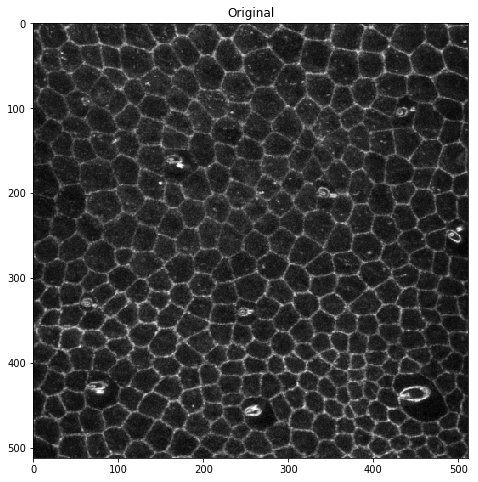

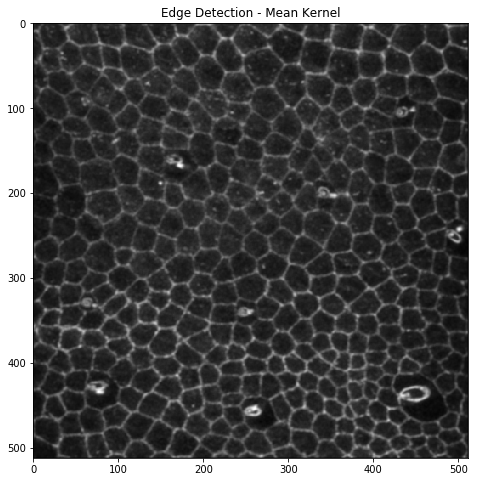

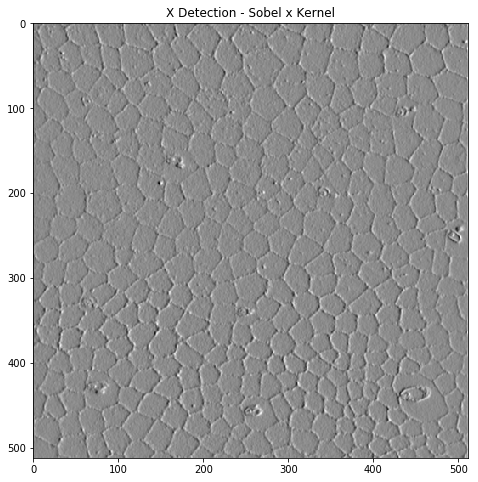

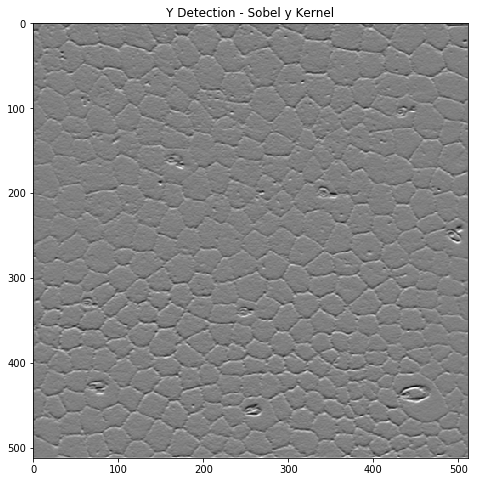

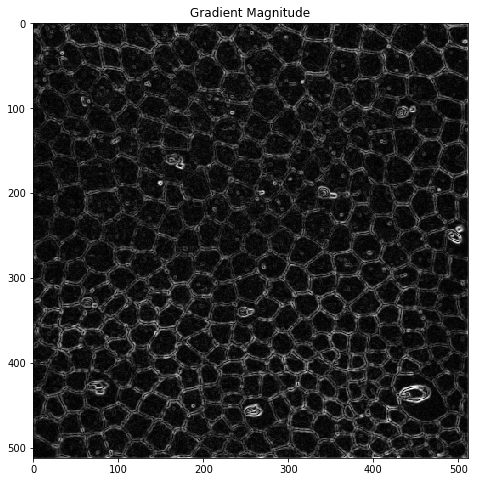

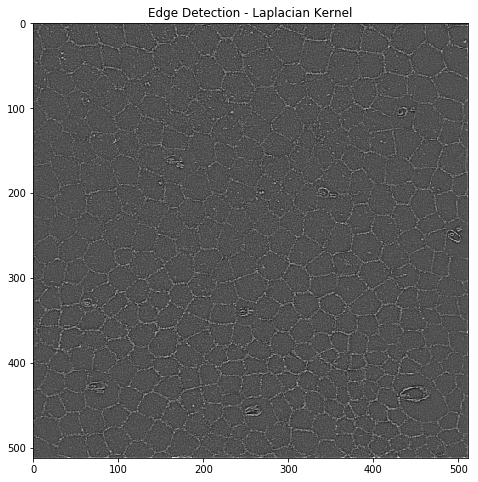

In [98]:
test_img = io.imread(os.path.join(img_path, "img/building.jpg"))
test_img = io.imread(os.path.join(img_path, "img/chair.jpg"))
test_img = raw_data[0]
test_img = rgb2gray(test_img)

# original img
plt.figure(figsize=(14,8))
plt.title("Original")
plt.imshow(test_img, cmap="gray")
plt.show()

# mean kernel
trans_img = convolve2d(test_img, mean_kernel, "same")
plt.figure(figsize=(14,8))
plt.title("Edge Detection - Mean Kernel")
plt.imshow(trans_img, cmap="gray")
plt.show()

# sobelx kernel
transx_img = convolve2d(test_img, sobelx_kernel, "same")
plt.figure(figsize=(14,8))
plt.title("X Detection - Sobel x Kernel")
plt.imshow(transx_img, cmap="gray")
plt.show()

# sobely kernel
transy_img = convolve2d(test_img, sobely_kernel, "same")
plt.figure(figsize=(14,8))
plt.title("Y Detection - Sobel y Kernel")
plt.imshow(transy_img, cmap="gray")
plt.show()

# gradient magnitud
grad_mag = np.sqrt(transx_img**2 + transy_img**2)
plt.figure(figsize=(14,8))
plt.title("Gradient Magnitude")
plt.imshow(grad_mag, cmap="gray")
plt.show()

# laplacian kernel
trans_img = convolve2d(test_img, laplacian_kernel, "same")
plt.figure(figsize=(14,8))
plt.title("Edge Detection - Laplacian Kernel")
plt.imshow(trans_img, cmap="gray")
plt.show()